#### Ficha laboratorial - Regressão - parte 1 (R.linear)

In [166]:
import numpy as np
from matplotlib import pyplot as plt
import pickle

In [167]:
file = open('RegressData001.p','rb')
D = pickle.load(file)
file.close()

In [168]:
x = D['x']
y = D['y']

(1, 500)
(1, 500)


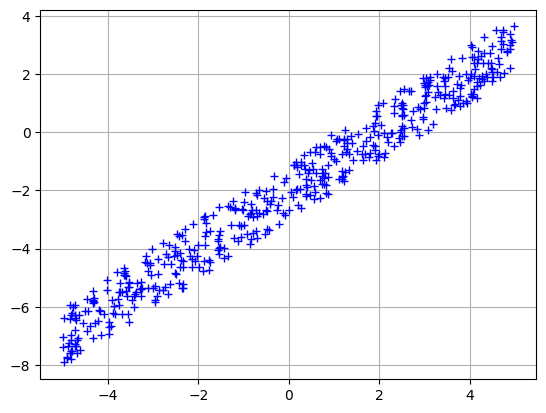

In [169]:
#Projeção dos dados
print(x.shape)
print(y.shape)
plt.figure()
plt.plot(x,y,'b+')
plt.grid()
plt.show()

In [170]:
#Cálculo das matrizes de optimização da regressão
n_points = x.shape[1]
X = np.vstack((np.ones((1,n_points)),x))
Rx = np.dot(X,X.T)
rxy = np.dot(X,y.T)


In [171]:
#Estimar Wopt para a reta de regressão
w = np.dot(np.linalg.pinv(Rx),rxy)
print(w)
#primeiro valor - termo independente w0
#segundo valor - declive w1

[[-2.01391133]
 [ 0.99728753]]


In [172]:
#Dois pontos para deseanhar a reta de regressão
x_min = np.min(x)
x_max = np.max(x)
p1 = np.array([x_min-1,x_max+1])
p1_temp = np.vstack((np.ones([1,2]),p1))
p2 = np.dot(w.T,p1_temp)
P = np.vstack((p1,p2))

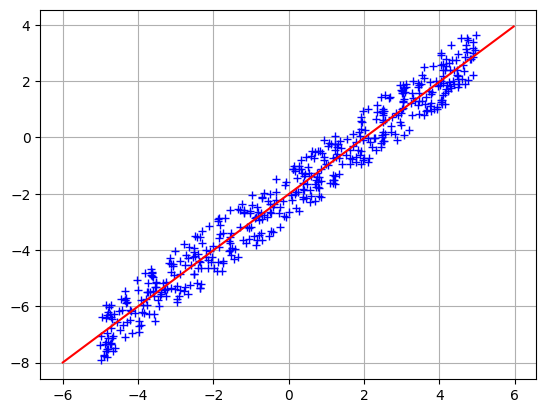

In [173]:
plt.figure()
plt.plot(x,y,'b+')
plt.plot(P[0,:],P[1,:],'r-')
plt.grid()
plt.show()

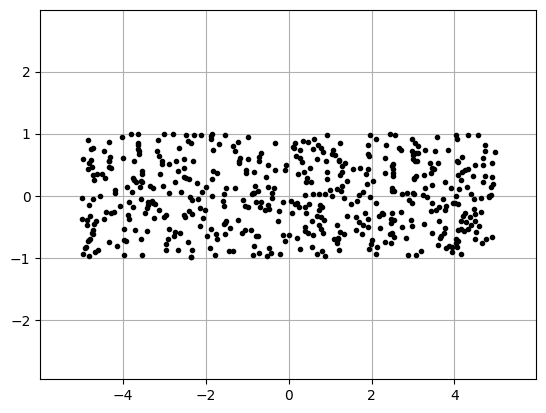

In [174]:
#Cálculo e gráfico dos erros de regressão
yh = np.dot(w.T,X)
erros = y-yh
x.shape
plt.figure()
plt.axis((x_min-1.,x_max+1.,np.min(erros)*3,np.max(erros)*3))
plt.plot(x,erros,'k.')
plt.grid()
plt.show()
#Ruido branco
#está entre o -1 e 1
# 

In [175]:
#Cálculo do coeficiente de regressão
my = np.mean(y)
SQtot = np.sum((y-my)**2) # variancia total
SQexp = np.sum((yh-my)**2) # variancia explicada
print(SQtot)
print(SQexp)
R2 = SQexp/SQtot # =1 explica tudo =0 não explica nada
print(R2)


4529.156952193196
4372.687475685116
0.9654528473710076


#### Ficha laboratorial - Regressão - parte 2 (R.Polinomial)

In [176]:
file = open('RegressData002.p','rb')
D = pickle.load(file)
file.close()

In [177]:
x = D['x']
y = D['y']

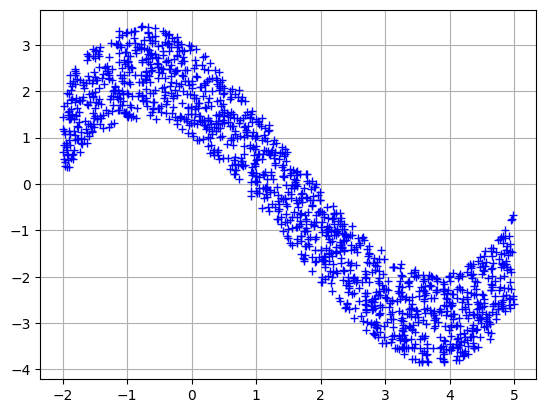

In [178]:
#Projeção dos dados
plt.figure()
plt.plot(x,y,'b+')
plt.grid()
plt.show()

In [179]:
#Cálculo das matrizes de optimização de regressão
n_points = x.shape[1]
X = np.vstack((np.ones((1,n_points)),x))
Rx = np.dot(X,X.T)
rxy = np.dot(X,y.T)

In [180]:
#Estimar Wopt para a reta de regressão
w = np.dot(np.linalg.pinv(Rx),rxy)
print(w)
#primeiro valor - termo independente w0
#segundo valor - declive w1

[[ 1.11538364]
 [-0.91987301]]


In [181]:
#Dois pontos para deseanhar a reta de regressão
x_min = np.min(x)
x_max = np.max(x)
p1 = np.array([x_min-1,x_max+1])
p1_temp = np.vstack((np.ones([1,2]),p1))
p2 = np.dot(w.T,p1_temp)
P = np.vstack((p1,p2))

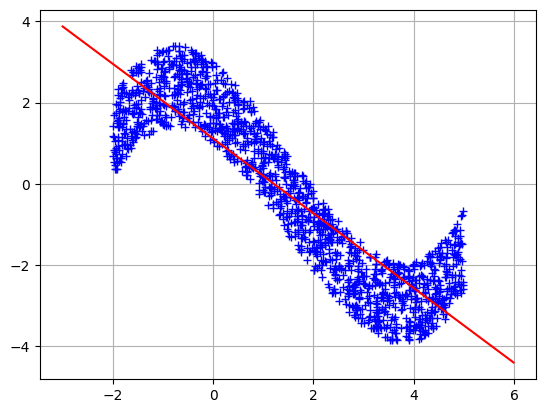

In [182]:
plt.figure()
plt.plot(x,y,'b+')
plt.plot(P[0,:],P[1,:],'r-')
plt.grid()
plt.show()

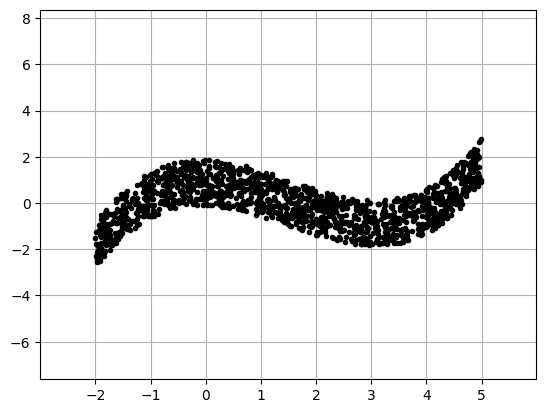

In [183]:
#Cálculo e gráfico dos erros de regressão
yh = np.dot(w.T,X)
erros = y-yh
x.shape
plt.figure()
plt.axis((x_min-1.,x_max+1.,np.min(erros)*3,np.max(erros)*3))
plt.plot(x,erros,'k.')
plt.grid()
plt.show()

In [184]:
#Cálculo do coeficiente de regressão
my = np.mean(y)
SQtot = np.sum((y-my)**2) # variancia total
SQexp = np.sum((yh-my)**2) # variancia explicada
R2 = SQexp/SQtot # =1 explica tudo =0 não explica nada
print(R2)

0.8001643397731496


In [185]:
#Cálculo das matrizes de optimização da regressão polinomial de grau 3
n_points = x.shape[1]
X = np.vstack((np.ones((1,n_points)),x**3,x**2,x)) # grau 3 por se saber que funciona para estes dados
Rx = np.dot(X,X.T)
rxy = np.dot(X,y.T)

In [186]:
#Estimar Wopt para os coeficientes da combinação linear
w = np.dot(np.linalg.pinv(Rx),rxy)
print(w)

[[ 2.01160905]
 [ 0.11294984]
 [-0.51315283]
 [-0.98245165]]


In [187]:
x_min = np.min(x)
x_max = np.max(x)
p1 = np.arange(x_min-1,x_max+1,0.25)
n_points = p1.size
p1_temp = np.vstack((np.ones([1,n_points]),p1**3,p1**2,p1))
p2 = np.dot(w.T,p1_temp)
P = np.vstack((p1,p2))

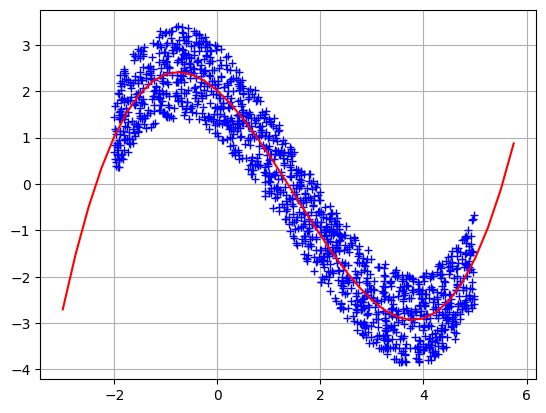

In [188]:
#Desenhar o polinómio de regressão
plt.figure()
plt.plot(x,y,'b+')
plt.plot(P[0,:],P[1,:],'r-')
plt.grid()
plt.show()

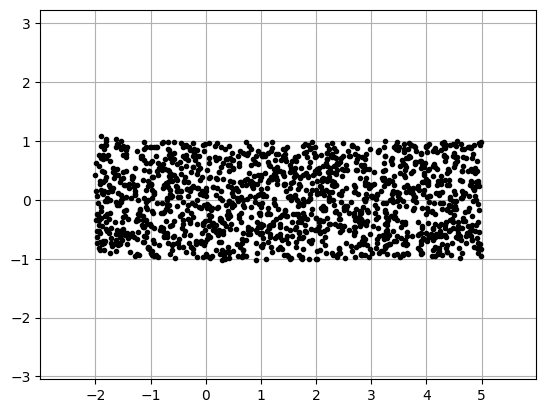

In [189]:
yh = np.dot(w.T,X)
erros = y-yh
x.shape
plt.figure()
plt.axis((x_min-1.,x_max+1.,np.min(erros)*3,np.max(erros)*3))
plt.plot(x,erros,'k.')
plt.grid()
plt.show()

In [190]:
#Cálculo do coeficiente 
my = np.mean(y)
SQtot = np.sum((y-my)**2)
SQexp = np.sum((yh-my)**2)
R2 = SQexp/SQtot
print(f'Este polinómio de regressão explica {np.round((100*R2),2)}% da variação')

Este polinómio de regressão explica 92.56% da variação
